MINI PROJECT
Unit–3: Unsupervised Learning & Dimensionality Reduction

Aman Verma 1753 FY AI&ML

Title: Customer Segmentation using Clustering and PCA

Dataset used : Mall_Customers.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1 : Data Understanding & Pre-processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the CSV file.
df = pd.read_csv('/content/drive/MyDrive/Aman_Verma_1753/Assessment completed/dataset/Mall_Customers.csv')

# Display the first few rows of the DataFrame
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Shape tells number of rows and columns
print("\nDataset Shape (Rows, Columns): ",df.shape)



Dataset Shape (Rows, Columns):  (200, 5)


In [ ]:
# Checking column data types and null values
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Basic statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Check missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Scaling ensures all numeric features have equal importance
# Important for clustering algorithms like K-Means
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns # the numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns # the categorical columns
# Selecting only numeric columns for scaling
scaled_features = scaler.fit_transform(df[numeric_cols])

# Convert scaled data back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)
final_df = pd.concat([scaled_df, df[categorical_cols].reset_index(drop=True)], axis=1) # to keep categorical columns also

print("\nScaled Dataset Preview:")
print(final_df.head())


Scaled Dataset Preview:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)   Genre
0   -1.723412 -1.424569           -1.738999               -0.434801    Male
1   -1.706091 -1.281035           -1.738999                1.195704    Male
2   -1.688771 -1.352802           -1.700830               -1.715913  Female
3   -1.671450 -1.137502           -1.700830                1.040418  Female
4   -1.654129 -0.563369           -1.662660               -0.395980  Female


# Step 2: Unsupervised Learning Overview

* **Why the dataset is unlabeled**

The given dataset contains customer-related information such as CustomerID, Genre, Age, Annual Income, and Spending Score. However, it does not contain any predefined output or target variable like customer segment or customer type. Since there is no label indicating what category each customer belongs to, the dataset is considered unlabeled. Therefore, supervised learning techniques cannot be applied.

* **Clustering as Unsupervised Learning**


Clustering is a type of unsupervised learning that works with unlabeled data. It groups similar data points together based on their features and patterns. Instead of predicting a known output, clustering discovers hidden structures within the data. In this project, clustering will be used to group customers who share similar income levels, spending habits, and demographic characteristics.

* **Objective of Clustering**


The main objective of clustering in this dataset is to identify different groups of customers based on their behavior and financial characteristics. This helps in understanding spending patterns, recognizing high-value customers, and supporting better business decision-making. Clustering can help businesses design targeted marketing strategies, improve customer engagement, and optimize product offerings.

# Step 3: K-Means Clustering

In [ ]:
# Import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CustomerID is just an identifier : not useful for clustering
# Genre is categorical :  we skip for now (K-Means works on numeric data)

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# K-Means uses distance calculation : scaling is necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

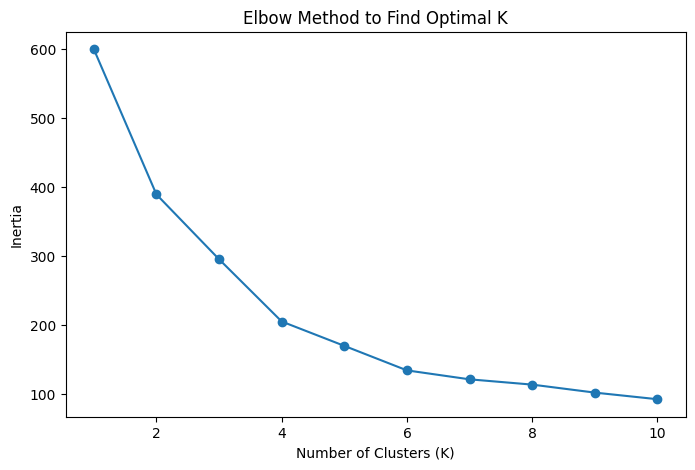

In [ ]:
# We test different K values and observe inertia
# Inertia = Sum of squared distances from cluster center
# Lower inertia means better clustering

inertia_values = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


In [ ]:
# Based on elbow graph, we choose K ( 5 for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit model and predict cluster labels
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = clusters
# we assign clusters labels to the dataset
print("Dataset with Cluster Labels:")
display(df.head())

Dataset with Cluster Labels:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


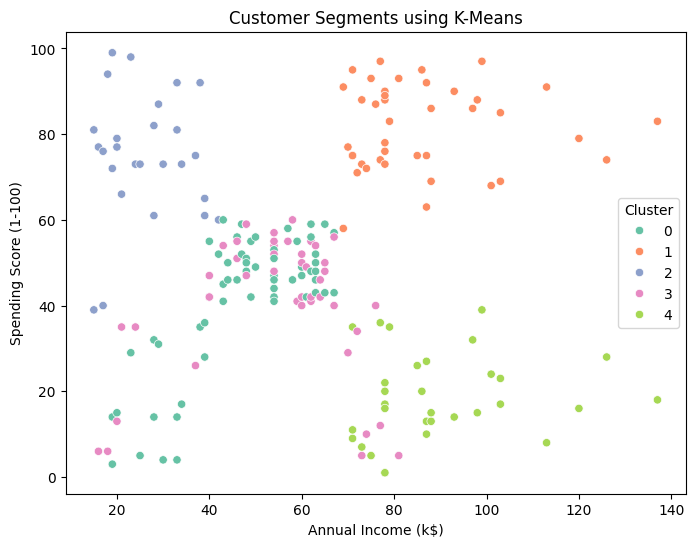

In [ ]:
# visualisation of the clusters
# Plot clusters using Income vs Spending Score

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2'
)

plt.title("Customer Segments using K-Means")
plt.show()

# Step 4: Hierarchical Clustering

In [ ]:
# Import required libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

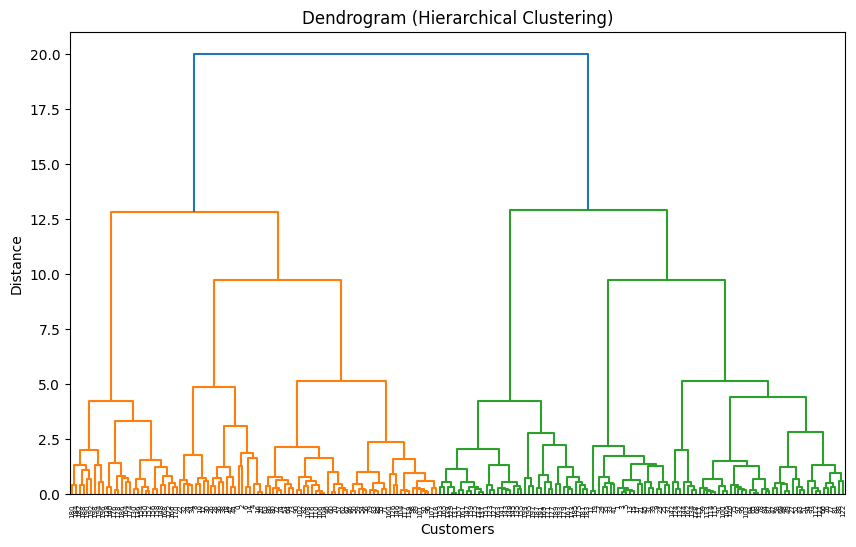

In [ ]:
# Using the same scaled data from K-Means step
# (X_scaled already created earlier in step 3)
# Dendrogram helps visualize how clusters merge
# It helps in deciding the optimal number of clusters

plt.figure(figsize=(10,6))

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [ ]:
# From dendrogram, we draw a horizontal line
# The number of vertical lines it cuts = number of clusters
# Usually for this dataset : around 5 clusters

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Assign cluster labels
hc_labels = hc.fit_predict(X_scaled)

# Add hierarchical cluster labels to dataset
df['HC_Cluster'] = hc_labels

print("Dataset with Hierarchical Cluster Labels:")
display(df.head())

Dataset with Hierarchical Cluster Labels:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,HC_Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4


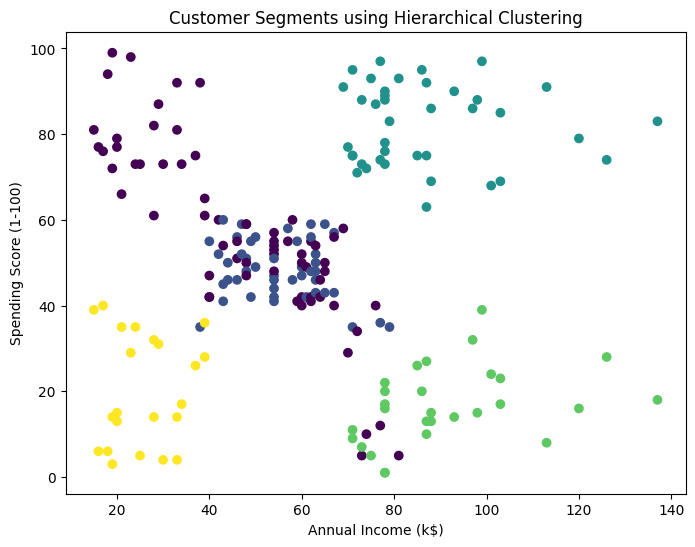

In [ ]:
# Using Income vs Spending Score for visualization of the hierarchical clusters

plt.figure(figsize=(8,6))

plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['HC_Cluster']
)

plt.title("Customer Segments using Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
print("\nCluster Count Comparison:")
# Compare with K-Means Clustering
print("K-Means Cluster Distribution:")
print(df['Cluster'].value_counts())

print("\nHierarchical Cluster Distribution:")
print(df['HC_Cluster'].value_counts())


Cluster Count Comparison:
K-Means Cluster Distribution:
Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

Hierarchical Cluster Distribution:
HC_Cluster
0    66
1    45
2    39
3    28
4    22
Name: count, dtype: int64


# Step 5: Cluster Evaluation using Silhouette Score

In [ ]:
# Import required library
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette Score measures how well data points fit within their cluster
# Range: -1 to +1
# +1  : Very well separated clusters
#  0  : Overlapping clusters
# -1  : Wrong clustering

kmeans_score = silhouette_score(X_scaled, df['Cluster'])

print("Silhouette Score for K-Means (K=5):", kmeans_score)

Silhouette Score for K-Means (K=5): 0.40846873777345605


In [ ]:
# Compare Silhouette Score for Different K Values
# Helps verify if chosen K is optimal

silhouette_scores = []

K_range = range(2, 11)  # Minimum 2 clusters required

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    print(f"K = {k}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.33547192894004574
K = 3, Silhouette Score = 0.3579234303882264
K = 4, Silhouette Score = 0.4039582785148566
K = 5, Silhouette Score = 0.40846873777345605
K = 6, Silhouette Score = 0.43106526216603014
K = 7, Silhouette Score = 0.410091114520974
K = 8, Silhouette Score = 0.3673663165322295
K = 9, Silhouette Score = 0.37442148555078425
K = 10, Silhouette Score = 0.36186970479722974


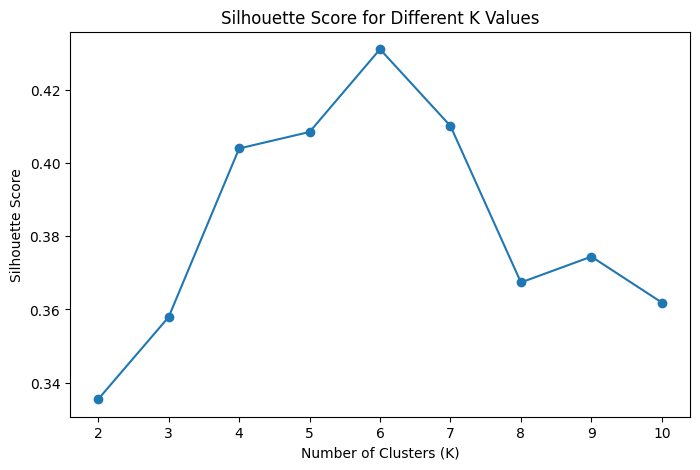

In [ ]:
# Visualize Silhouette Scores
# Helps identify best K visually

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')

plt.title("Silhouette Score for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Step 6: Dimensionality Reduction using PCA

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

In [ ]:
# PCA transforms original features into new components
# These components capture maximum variance (information)

pca = PCA()

# Fit PCA on scaled dataset
pca.fit(X_scaled)

PCA()

In [ ]:
# Explained variance shows how much information each component retains

variance = pca.explained_variance_ratio_

print("Variance captured by each component:")
print(variance)

print("\nTotal Variance Captured:")
print(sum(variance))

Variance captured by each component:
[0.44266167 0.33308378 0.22425454]

Total Variance Captured:
1.0


In [ ]:
# Reducing to 2 components helps visualize clusters easily

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

# Convert PCA result into DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

print("\nReduced Dataset Preview:")
print(pca_df.head())


Reduced Dataset Preview:
        PC1       PC2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740


In [ ]:
# Adding Cluster Labels for Visualization
# Helps visualize clusters in 2D space

pca_df['Cluster'] = df['Cluster']


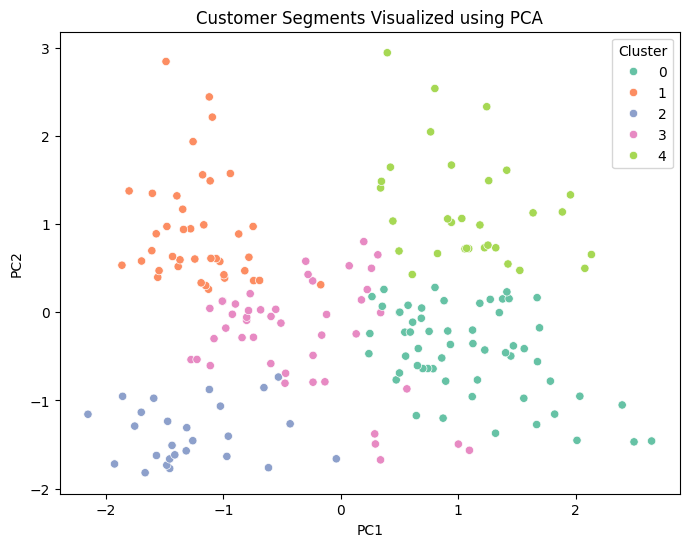

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['Cluster'],
    palette='Set2'
)

plt.title("Customer Segments Visualized using PCA")
plt.show()

# Step 7: Visualization of High-Dimensional Data

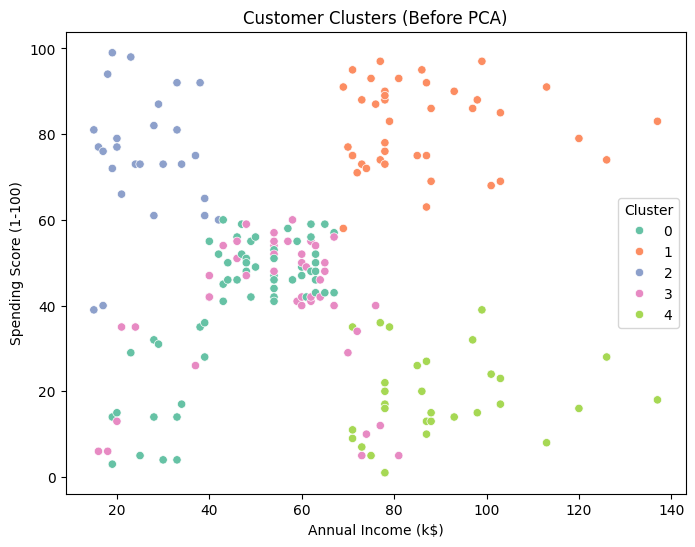

In [ ]:
# Plotting Original (Before PCA) High-Dimensional View
# Since original data has 3 features, we visualize using 2 important ones
# Income vs Spending Score is commonly used for customer segmentation

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2'
)

plt.title("Customer Clusters (Before PCA)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

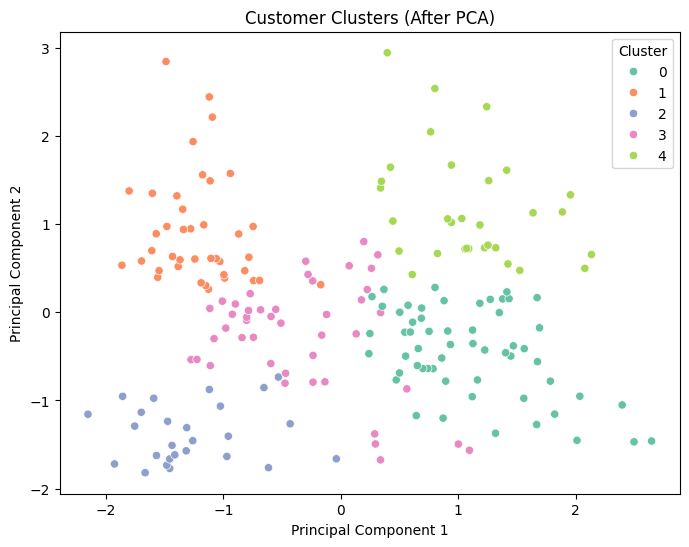

In [ ]:
# Ploting PCA Components (After Dimensionality Reduction)
# PCA converts multiple features into 2 principal components
# Helps visualize overall clustering structure better

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['Cluster'],
    palette='Set2'
)

plt.title("Customer Clusters (After PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# Comparing Variance Retained After PCA
# Shows how much original information is preserved

print("Variance captured by PC1:", pca.explained_variance_ratio_[0])
print("Variance captured by PC2:", pca.explained_variance_ratio_[1])
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))



Variance captured by PC1: 0.4426616720824504
Variance captured by PC2: 0.33308378461522425
Total Variance Captured: 0.7757454566976747


# Step 8: Feature Reduction & Optimization

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

**How PCA Reduces Noise (Concept in Comments)** :
 * PCA keeps components that capture maximum variance.
* Features that contribute very little variance are often noise.


 By removing low-variance components, PCA:
 - Removes redundant information
 - Reduces dimensional complexity
 - Improves clustering performance

In [ ]:
# Silhouette Score BEFORE PCA
# Using original scaled features

kmeans_original = KMeans(n_clusters=5, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

score_before = silhouette_score(X_scaled, labels_original)

print("Silhouette Score BEFORE PCA:", score_before)

Silhouette Score BEFORE PCA: 0.40846873777345605


In [ ]:
# Silhouette Score AFTER PCA
# Using reduced dataset (2 principal components)

kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

score_after = silhouette_score(X_pca, labels_pca)

print("Silhouette Score AFTER PCA:", score_after)

Silhouette Score AFTER PCA: 0.38978616968277197


In [ ]:
# Compare Results
if score_after > score_before:
    print("\nPCA Improved Clustering Quality")
elif score_after < score_before:
    print("\nPCA Slightly Reduced Clustering Quality")
else:
    print("\nPCA Did Not Change Clustering Quality")


PCA Slightly Reduced Clustering Quality


In [ ]:
# Display Variance Retained After PCA
# Helps justify whether dimensionality reduction is acceptable

print("\nVariance retained after PCA:",
      sum(pca.explained_variance_ratio_))


Variance retained after PCA: 0.7757454566976747
